# Best Tamil movies from 1990 to 2018 (Cult Classics)

Link from which this data was scraped from: https://www.imdb.com/list/ls059143798/?sort=user_rating,desc&st_dt=&mode=detail&page=1 

In [2]:
import requests
from bs4 import BeautifulSoup

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [7]:
url = "https://www.imdb.com/list/ls059143798/?sort=user_rating,desc&st_dt=&mode=detail&page=1"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [9]:
# Let's create an empty list 

movie_name = []
year = []
time = []
rating = []
votes = []
gross = []

In [10]:
movie_data = soup.findAll("div", attrs = {"class": "lister-item mode-detail"})

In [11]:
for store in movie_data: 
    name = store.h3.a.text
    movie_name.append(name)
    
    year_of_release = store.h3.find('span', class_ ="lister-item-year text-muted unbold").text.replace('(', '').replace(')', '')
    year.append(year_of_release)
    
    runtime = store.p.find("span", class_ = "runtime").text.replace(" min", "")
    time.append(runtime)
    
    rate = store.find('span', class_ = "ipl-rating-star__rating").text
    rating.append(rate)
    
    value = store.findAll("span", attrs = {"name": "nv"})
    vote = value[0].text
    votes.append(vote)
    
    grosses = value[1].text if len(value)>1 else "******"
    gross.append(grosses)

    

In [39]:
movie_df = pd.DataFrame({"Name": movie_name, "Year_of_release": year, "Watchtime": time, "Ratings": rating, "Votes": votes, "Gross": gross})

In [40]:
movie_df

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
0,Pariyerum Perumal,2018,154,8.7,"16,580",******
1,Thevar Magan,1992,145,8.7,"7,458",******
2,Anbe Sivam,2003,160,8.6,"23,783",******
3,Kuruthipunal,1995,143,8.6,"4,479",******
4,Mahanadhi,1994,162,8.6,"4,190",******
...,...,...,...,...,...,...
95,Autograph,2004,168,7.8,"1,153",******
96,Mankatha,2011,155,7.7,"15,739",******
97,Naan Kadavul,2009,165,7.7,"2,149",******
98,Aramm,2017,119,7.7,"1,874",******


In [50]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             100 non-null    object
 1   Year_of_release  100 non-null    object
 2   Watchtime        100 non-null    object
 3   Ratings          100 non-null    object
 4   Votes            100 non-null    object
 5   Gross            100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [52]:
# Convering ratings to numeric to help us analyze the data

movie_df["Ratings"] = pd.to_numeric(movie_df["Ratings"])

In [53]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             100 non-null    object 
 1   Year_of_release  100 non-null    object 
 2   Watchtime        100 non-null    object 
 3   Ratings          100 non-null    float64
 4   Votes            100 non-null    object 
 5   Gross            100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB


In [54]:
# Converting watchtime to numeric

movie_df["Watchtime"] = pd.to_numeric(movie_df["Watchtime"])

In [55]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             100 non-null    object 
 1   Year_of_release  100 non-null    object 
 2   Watchtime        100 non-null    int64  
 3   Ratings          100 non-null    float64
 4   Votes            100 non-null    object 
 5   Gross            100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [59]:
# Converting votes to numeric 

movie_df["Votes"] = movie_df["Votes"].str.replace(',', '')

In [60]:
movie_df

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
0,Pariyerum Perumal,2018,154,8.7,16580,******
1,Thevar Magan,1992,145,8.7,7458,******
2,Anbe Sivam,2003,160,8.6,23783,******
3,Kuruthipunal,1995,143,8.6,4479,******
4,Mahanadhi,1994,162,8.6,4190,******
...,...,...,...,...,...,...
95,Autograph,2004,168,7.8,1153,******
96,Mankatha,2011,155,7.7,15739,******
97,Naan Kadavul,2009,165,7.7,2149,******
98,Aramm,2017,119,7.7,1874,******


In [61]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             100 non-null    object 
 1   Year_of_release  100 non-null    object 
 2   Watchtime        100 non-null    int64  
 3   Ratings          100 non-null    float64
 4   Votes            100 non-null    object 
 5   Gross            100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [62]:
movie_df["Votes"] = pd.to_numeric(movie_df["Votes"])

In [63]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             100 non-null    object 
 1   Year_of_release  100 non-null    object 
 2   Watchtime        100 non-null    int64  
 3   Ratings          100 non-null    float64
 4   Votes            100 non-null    int64  
 5   Gross            100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


In [73]:
# What is the highest IMDB rating 

movie_df["Ratings"].max()


# Thr highest IMDB rating for tamil cult classic movie is 8.7

8.7

In [75]:
# Which of the two movies have the highest IMDB rating among the tamil cult classics

movie_df[movie_df.Ratings == 8.7]

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
0,Pariyerum Perumal,2018,154,8.7,16580,******
1,Thevar Magan,1992,145,8.7,7458,******


In [81]:
# Which movie has received the highest votes among tamil cult classics 

movie_df["Votes"].max()


# The highest number of votes received for a movie is 46749 

46749

In [82]:
movie_df[movie_df["Votes"]==46749]


# It was Vikram Vedha that received the highest number of votes among the cult classics 

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
30,Vikram Vedha,2017,147,8.2,46749,******


In [90]:
# Rank the top 20 cult classic movies according to the number of votes
movie_df.sort_values(by = ["Votes"], ascending = False).head(20)

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
30,Vikram Vedha,2017,147,8.2,46749,******
21,Ratsasan,2018,170,8.3,46153,******
71,Vishwaroopam,2013,148,7.9,40473,******
45,Thuppakki,2012,165,8.1,35667,******
5,96,II 2018,158,8.5,32505,******
46,Kaththi,2014,166,8.1,28087,******
2,Anbe Sivam,2003,160,8.6,23783,******
87,24,I 2016,164,7.8,22842,******
17,Thani Oruvan,2015,160,8.4,20608,******
22,Anniyan,2005,183,8.3,19357,******


In [136]:
# Top 10 cult classic movies based on number of votes 

top_10_voted_movies = movie_df.sort_values(by = ["Votes"], ascending = False).head(10)
top_10_voted_movies

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
30,Vikram Vedha,2017,147,8.2,46749,******
21,Ratsasan,2018,170,8.3,46153,******
71,Vishwaroopam,2013,148,7.9,40473,******
45,Thuppakki,2012,165,8.1,35667,******
5,96,II 2018,158,8.5,32505,******
46,Kaththi,2014,166,8.1,28087,******
2,Anbe Sivam,2003,160,8.6,23783,******
87,24,I 2016,164,7.8,22842,******
17,Thani Oruvan,2015,160,8.4,20608,******
22,Anniyan,2005,183,8.3,19357,******


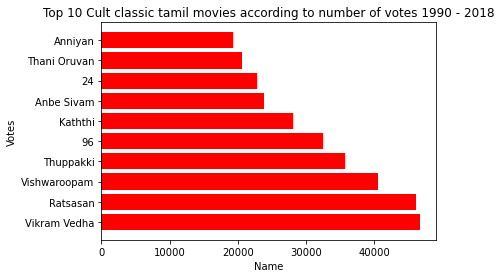

In [137]:
# Creating a horizontal bar graph of highly voted cult classic movies

plt.barh("Name", "Votes", data = top_10_voted_movies, color = "red") 
plt.xlabel("Name") 
plt.ylabel("Votes") 
plt.title("Top 10 Cult classic tamil movies according to number of votes 1990 - 2018")
plt.show()

In [134]:
# Rank the top 10 cult classic movies in tamil according to the ratings

movie_df.sort_values(by = ["Ratings"], ascending = False).head(20)

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
0,Pariyerum Perumal,2018,154,8.7,16580,******
1,Thevar Magan,1992,145,8.7,7458,******
2,Anbe Sivam,2003,160,8.6,23783,******
3,Kuruthipunal,1995,143,8.6,4479,******
4,Mahanadhi,1994,162,8.6,4190,******
5,96,II 2018,158,8.5,32505,******
6,Visaaranai,2015,117,8.5,11095,******
7,Pudhu Pettai,2006,168,8.5,6908,******
8,Michael Madana Kama Rajan,1990,162,8.5,4773,******
9,Thalapathi,1991,157,8.5,12601,******


In [167]:
# Top 10 tamil cult classics from 1990 - 2018 based on the highest IMDB Ratings

top_10_tamil_ratings = movie_df.sort_values(by = ["Ratings"], ascending = False).head(10)

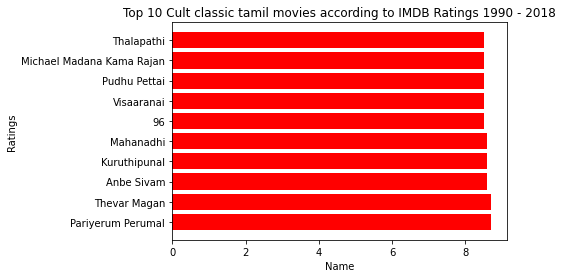

In [168]:
# Visualizing the tamil cult classics with highest IMDB ratings from 1990 to 2018

# Pariyerum Perumal has the highest IMDB Ratings along with Thevar Magan at 8.7

plt.barh("Name", "Ratings", data = top_10_tamil_ratings, color = "red") 
plt.xlabel("Name") 
plt.ylabel("Ratings") 
plt.title("Top 10 Cult classic tamil movies according to IMDB Ratings 1990 - 2018")
plt.show()

In [92]:
# Rank the top 20 tamil cult classics with highest watchtime 

movie_df.sort_values(by = ["Watchtime"], ascending = False).head(20)

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
70,Hey Ram,2000,186,7.9,13295,0.27M
72,7/G Rainbow Colony,2004,186,7.9,2731,******
58,Anjathe,2008,185,8.1,2352,******
54,Indian,1996,185,8.1,13008,******
65,Aayirathil Oruvan,2010,183,8.0,7066,******
22,Anniyan,2005,183,8.3,19357,******
41,Padayappa,1999,181,8.2,7278,******
86,Thavamai Thavamiruntu,2005,180,7.9,551,******
19,Papanasam,2015,179,8.4,7717,******
13,Mahanati,2018,177,8.4,13303,******


In [139]:
# Top 10 movies according to the highest watch time


top_10_movies_watchtime = movie_df.sort_values(by = ["Watchtime"], ascending = False).head(10)

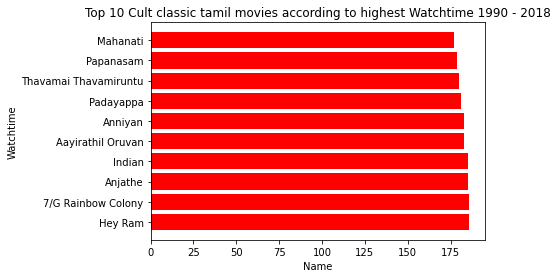

In [141]:
# Visualizing the top 10 tamil cult classics according to its highest number of watchtime 

# Hey Ram the iconic Kamal Hassan's film had the highest watchtime  and 7G rainbow colony too has almost the same watchtime

plt.barh("Name", "Watchtime", data = top_10_movies_watchtime, color = "red") 
plt.xlabel("Name") 
plt.ylabel("Watchtime") 
plt.title("Top 10 Cult classic tamil movies according to highest Watchtime 1990 - 2018")
plt.show()

In [93]:
# Which year had witnessed the highest number of releases in cult classics in tamil cinema

# It was 2011 that had the highest number of cult classics released in tamil cinema 

movie_df["Year_of_release"].value_counts()

2011       8
2014       6
2016       6
2004       6
2013       5
2017       5
2015       5
2006       4
2007       4
2010       4
2018       4
2005       4
1999       4
1995       4
2012       3
2008       3
2003       3
1992       3
2009       2
2002       2
1990       2
2000       2
1991       2
I 2002     1
1996       1
II 2012    1
1993       1
I 2016     1
II 2018    1
2019       1
1994       1
1997       1
Name: Year_of_release, dtype: int64

Text(0.5, 1.0, 'Highest number of cult classic releases in tamil cinema')

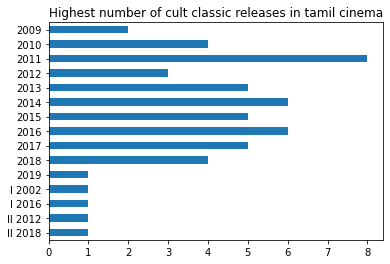

In [166]:
# Visualizing which year had the highest number of releases of cult classics in tamil cinema 

movie_df["Year_of_release"].value_counts().sort_index(ascending=False).head(15).plot.barh()
plt.title("Highest number of cult classic releases in tamil cinema")

In [97]:
# What were those cult classics movies that had released in 2011

movie_df[movie_df.Year_of_release == "2011"]

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
40,Deiva Thirumagal,2011,162,8.2,6132,******
48,Aadukalam,2011,160,8.1,6636,******
60,Vaagai Sooda Vaa,2011,123,8.1,983,******
64,Yutham Sei,2011,160,8.0,2128,******
80,Engeyum Eppodhum,2011,150,7.9,2105,******
88,Ko,2011,128,7.8,6046,******
94,Mouna Guru,2011,153,7.8,884,******
96,Mankatha,2011,155,7.7,15739,******


In [98]:
# What were the cult classics movies released during 2014

movie_df[movie_df.Year_of_release == "2014"]

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
27,Kaakkaa Muttai,2014,91,8.3,7296,******
33,Jigarthanda,2014,171,8.2,12276,******
46,Kaththi,2014,166,8.1,28087,******
57,Sathuranga Vettai,2014,145,8.1,3426,******
74,Madras,2014,156,7.9,4541,******
76,Pannaiyarum Padminiyum,2014,151,7.9,1832,******


In [99]:
# What were the cult classics released during 2016

movie_df[movie_df.Year_of_release == "2016"]

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
15,Aruvi,2016,130,8.4,13383,******
23,Joker,2016,130,8.3,3589,******
34,Dhuruvangal Pathinaaru,2016,105,8.2,16096,******
50,Aandavan Kattalai,2016,151,8.1,2912,******
63,Iraivi,2016,160,8.0,3436,******
75,Uriyadi,2016,91,7.9,2577,******


In [100]:
# What were the cult classics released during 2017


movie_df[movie_df.Year_of_release == "2017"]

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
30,Vikram Vedha,2017,147,8.2,46749,******
31,Theeran Adhigaaram Ondru,2017,157,8.2,15518,******
44,Maanagaram,2017,137,8.1,6509,******
66,Kurangu Bommai,2017,106,8.0,1570,******
98,Aramm,2017,119,7.7,1874,******


In [101]:
# What were the cult classics movies released during 2013

movie_df[movie_df.Year_of_release == "2013"]

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
24,Soodhu Kavvum,2013,135,8.3,10715,******
53,Onaayum Aattukkuttiyum,2013,141,8.1,2813,******
67,Paradesi,2013,126,8.0,1998,******
71,Vishwaroopam,2013,148,7.9,40473,******
84,Thanga Meengal,2013,140,7.9,1034,******


In [102]:
# What were the cult classics movies released during 2015

movie_df[movie_df.Year_of_release == "2015"]

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
6,Visaaranai,2015,117,8.5,11095,******
17,Thani Oruvan,2015,160,8.4,20608,******
19,Papanasam,2015,179,8.4,7717,******
62,Indru Netru Naalai,2015,146,8.0,4575,******
85,Kuttram Kadithal,2015,120,7.9,789,******


In [ ]:
## Analyzing some years data was separated due to special characters like I, or II from IMDB

In [105]:
movie_df[movie_df.Year_of_release == "II 2018"]

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
5,96,II 2018,158,8.5,32505,******


In [106]:
movie_df[movie_df.Year_of_release == "I 2002"]

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
42,Ramana,I 2002,140,8.2,2077,******


In [108]:
movie_df[movie_df.Year_of_release == "II 2012"]

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
61,Pizza,II 2012,127,8.0,8166,******


In [109]:
movie_df[movie_df.Year_of_release == "I 2016"]

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
87,24,I 2016,164,7.8,22842,******


In [ ]:
# It was during the years of 1993, 1994, 1995, 1996 and 1997 had the least number of tamil cult classics released and it was only one.

# From 1995, tamil cinema has released atleast 3, 4, 5 or 6 cult classics in a year

# This shows that as the years progressed, tamil cinema produced more cult classics 



In [110]:
# List the top 20 tamil cult classics had the lowest IMDB rating 

movie_df.sort_values(by = ["Ratings"]).head(20)

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
99,Annamalai,1992,164,7.7,2159,******
96,Mankatha,2011,155,7.7,15739,******
98,Aramm,2017,119,7.7,1874,******
97,Naan Kadavul,2009,165,7.7,2149,******
95,Autograph,2004,168,7.8,1153,******
88,Ko,2011,128,7.8,6046,******
89,Gentleman,1993,160,7.8,2543,******
90,Veyyil,2006,136,7.8,784,******
87,24,I 2016,164,7.8,22842,******
92,Raam,2005,154,7.8,1366,******


In [159]:
# Top 10 cult classics in tamil with lowest IMDB rating 

tamil_movies_low_rating = movie_df.sort_values(by = ["Ratings"]).head(10)

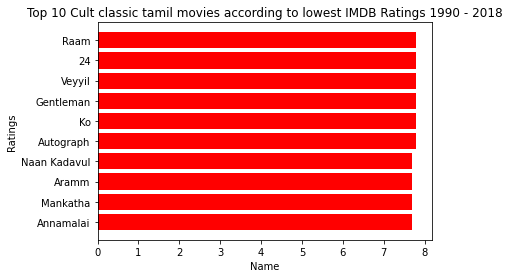

In [161]:
# Visualizing top 10 cult classic tamil movies according to lowest IMDB ratings

# Annamalai and Manakatha has the lowest IMDB ratings in the cult classics

# But they are mass commercial and industrial hits in tamil cinema 


plt.barh("Name", "Ratings", data = tamil_movies_low_rating, color = "red") 
plt.xlabel("Name") 
plt.ylabel("Ratings") 
plt.title("Top 10 Cult classic tamil movies according to lowest IMDB Ratings 1990 - 2018")
plt.show()

In [111]:
# List the top 20 tamil cult classics that had the lowest number of votes 

# The lowest votes does not mean that the film was worst

movie_df.sort_values(by = ["Votes"]).head(20)

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
86,Thavamai Thavamiruntu,2005,180,7.9,551,******
90,Veyyil,2006,136,7.8,784,******
85,Kuttram Kadithal,2015,120,7.9,789,******
83,To Let,2019,99,7.9,820,******
94,Mouna Guru,2011,153,7.8,884,******
60,Vaagai Sooda Vaa,2011,123,8.1,983,******
84,Thanga Meengal,2013,140,7.9,1034,******
95,Autograph,2004,168,7.8,1153,******
92,Raam,2005,154,7.8,1366,******
91,Raam,2005,154,7.8,1366,******


In [162]:
# Top 10 tamil movies with the lowest number of votes 

top_10_lowest_voted = movie_df.sort_values(by = ["Votes"]).head(10)

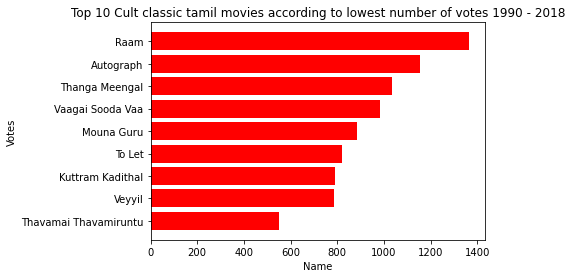

In [163]:
# Top 10 tamil movies with the lowest number of votes 

# Thavamai Thavamirundhu has the lowest number of votes

# This does not mean the movies were worst

# These were more experimental movies in Tamil cinema 

plt.barh("Name", "Votes", data = top_10_lowest_voted, color = "red") 
plt.xlabel("Name") 
plt.ylabel("Votes") 
plt.title("Top 10 Cult classic tamil movies according to lowest number of votes 1990 - 2018")
plt.show()

In [116]:
# List the top 20 tamil cult classics that had the lowest watchtime 

movie_df.sort_values(by = ["Watchtime"]).head(20)

,Name,Year_of_release,Watchtime,Ratings,Votes,Gross
27,Kaakkaa Muttai,2014,91,8.3,7296,******
75,Uriyadi,2016,91,7.9,2577,******
83,To Let,2019,99,7.9,820,******
34,Dhuruvangal Pathinaaru,2016,105,8.2,16096,******
66,Kurangu Bommai,2017,106,8.0,1570,******
69,Unnaipol Oruvan,2009,106,8.0,5944,******
6,Visaaranai,2015,117,8.5,11095,******
98,Aramm,2017,119,7.7,1874,******
85,Kuttram Kadithal,2015,120,7.9,789,******
60,Vaagai Sooda Vaa,2011,123,8.1,983,******


In [164]:
# Top 10 tamil cult classics according to lowest watchtime 

lowest_watchtime_movies = movie_df.sort_values(by = ["Watchtime"]).head(10)

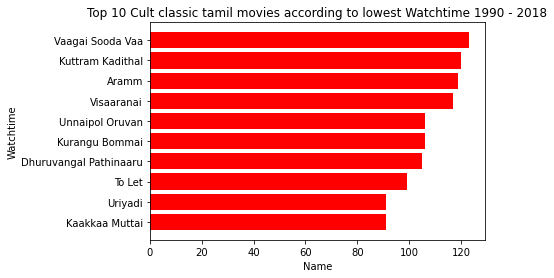

In [165]:
# Visualizing the top 10 cult classics with the lowest watchtime 

# Kakka muttai and Uriyadi were the cult classics with lowest watchtime

# These kinds od movies are mostly experimental and small-budgeted 

plt.barh("Name", "Watchtime", data = lowest_watchtime_movies, color = "red") 
plt.xlabel("Name") 
plt.ylabel("Watchtime") 
plt.title("Top 10 Cult classic tamil movies according to lowest Watchtime 1990 - 2018")
plt.show()

In [119]:
# What was the average watchtime of the tamil cult classics movies 


# The average watchtime of tamil cult classics is 150 minutes (rough average) to 154 minutes (median average)

sum(movie_df["Watchtime"])/len(movie_df["Watchtime"])

150.51

In [120]:
movie_df["Watchtime"].median()

154.0

In [123]:
# What was the average ratings of the tamil cult classics 

# The mean and median ratings of tamil cult classics is 8.1 

movie_df["Ratings"].mean()

8.127999999999998

In [124]:
movie_df["Ratings"].median()

8.1

In [125]:
# What was the average number of votes applied for tamil cult classics 

# The mean or the average votes are 8448 and the median votes are 5458


movie_df["Votes"].mean()

8448.23

In [126]:
movie_df["Votes"].median()

5458.5